In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('worldcup-socioeconomic-analysis/data/created_datasets/world_cup/merge_wc_with_socioeconomic.csv')
df.head()

,world_cup_year,team,host_country,max_stage,max_stage_numeric,matches_played,matches_won,goals_for,goals_against,Big5_flag,start_date,rank_date,clean_country,rank,gdp_per_capita_tminus0,gdp_per_capita_tminus1,gdp_per_capita_tminus2,gdp_per_capita_tminus3,norm_gdp_per_capita_tminus0,norm_gdp_per_capita_tminus1,norm_gdp_per_capita_tminus2,norm_gdp_per_capita_tminus3,hdi_tminus0,hdi_tminus1,hdi_tminus2,hdi_tminus3,life_expectancy_tminus0,life_expectancy_tminus1,life_expectancy_tminus2,life_expectancy_tminus3,mean_school_years_tminus0,mean_school_years_tminus1,mean_school_years_tminus2,mean_school_years_tminus3
0,1994,Algeria,USA,Did not qualify,0.0,0.0,0.0,0.0,0.0,NaN,1994-06-17,1994-06-14,Algeria,48.0,1525.540618,1831.048010,1802.693008,1759.112016,-0.420688,-0.404067,-0.405610,-0.407981,0.603,0.603,0.601,0.596,67.284,67.797,67.725,67.692,4.649519,4.466413,4.283306,4.100199
1,1998,Algeria,France,Did not qualify,0.0,0.0,0.0,0.0,0.0,NaN,1998-06-10,1998-05-20,Algeria,57.0,1603.366232,1628.761006,1616.831987,1466.948068,-0.416454,-0.415072,-0.415721,-0.423876,0.634,0.624,0.615,0.608,69.327,68.859,68.219,67.691,5.298505,5.143212,4.987919,4.832626
2,2002,Algeria,Korea/Japan,Did not qualify,0.0,0.0,0.0,0.0,0.0,NaN,2002-05-31,2002-05-15,Algeria,79.0,1937.464114,1896.300209,1772.928691,1596.118222,-0.398278,-0.400517,-0.407229,-0.416848,0.669,0.659,0.651,0.643,71.644,71.025,70.576,70.088,5.757431,5.683261,5.609091,5.453798
3,2006,Algeria,Germany,Did not qualify,0.0,0.0,0.0,0.0,0.0,NaN,2006-06-09,2006-05-17,Algeria,87.0,3660.661047,3233.133396,2816.993850,2283.772993,-0.304528,-0.327787,-0.350427,-0.379437,0.698,0.692,0.685,0.677,73.116,72.836,72.536,71.906,6.170000,5.979940,5.905770,5.831600
4,2010,Algeria,South Africa,Group stage,1.0,3.0,0.0,0.0,2.0,0.478261,2010-06-11,2010-05-26,Algeria,30.0,4912.785855,4235.429905,5180.918815,4167.451699,-0.236407,-0.273258,-0.221819,-0.276956,0.718,0.714,0.711,0.704,74.144,73.871,73.618,73.346,5.816667,6.053333,6.290000,6.230000


In [3]:
df['team'].unique()

array(['Algeria', 'Angola', 'Argentina', 'Australia', 'Austria',
       'Belgium', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil',
       'Bulgaria', 'Cameroon', 'Canada', 'Chile', 'China', 'Colombia',
       'Costa Rica', 'Croatia', 'Czech Republic', 'Denmark', 'Ecuador',
       'Egypt', 'England', 'France', 'Germany', 'Ghana', 'Greece',
       'Honduras', 'Iceland', 'Iran', 'Italy', 'Ivory Coast', 'Jamaica',
       'Japan', 'Mexico', 'Morocco', 'Netherlands', 'New Zealand',
       'Nigeria', 'North Korea', 'Norway', 'Panama', 'Paraguay', 'Peru',
       'Poland', 'Portugal', 'Qatar', 'Republic of Ireland', 'Romania',
       'Russia', 'Saudi Arabia', 'Scotland', 'Senegal', 'Serbia',
       'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Spain',
       'Sweden', 'Switzerland', 'Togo', 'Trinidad and Tobago', 'Tunisia',
       'Turkey', 'Ukraine', 'United States', 'Uruguay', 'Wales'],
      dtype=object)

In [4]:
df.columns.values

array(['world_cup_year', 'team', 'host_country', 'max_stage',
       'max_stage_numeric', 'matches_played', 'matches_won', 'goals_for',
       'goals_against', 'Big5_flag', 'start_date', 'rank_date',
       'clean_country', 'rank', 'gdp_per_capita_tminus0',
       'gdp_per_capita_tminus1', 'gdp_per_capita_tminus2',
       'gdp_per_capita_tminus3', 'norm_gdp_per_capita_tminus0',
       'norm_gdp_per_capita_tminus1', 'norm_gdp_per_capita_tminus2',
       'norm_gdp_per_capita_tminus3', 'hdi_tminus0', 'hdi_tminus1',
       'hdi_tminus2', 'hdi_tminus3', 'life_expectancy_tminus0',
       'life_expectancy_tminus1', 'life_expectancy_tminus2',
       'life_expectancy_tminus3', 'mean_school_years_tminus0',
       'mean_school_years_tminus1', 'mean_school_years_tminus2',
       'mean_school_years_tminus3'], dtype=object)

In [5]:
# take log of gdp
df['log_gdp_tminus0'] = np.log(df['gdp_per_capita_tminus0'])
df['log_gdp_tminus1'] = np.log(df['gdp_per_capita_tminus1'])
df['log_gdp_tminus2'] = np.log(df['gdp_per_capita_tminus2'])
df['log_gdp_tminus3'] = np.log(df['gdp_per_capita_tminus3'])
df

,world_cup_year,team,host_country,max_stage,max_stage_numeric,matches_played,matches_won,goals_for,goals_against,Big5_flag,start_date,rank_date,clean_country,rank,gdp_per_capita_tminus0,gdp_per_capita_tminus1,gdp_per_capita_tminus2,gdp_per_capita_tminus3,norm_gdp_per_capita_tminus0,norm_gdp_per_capita_tminus1,norm_gdp_per_capita_tminus2,norm_gdp_per_capita_tminus3,hdi_tminus0,hdi_tminus1,hdi_tminus2,hdi_tminus3,life_expectancy_tminus0,life_expectancy_tminus1,life_expectancy_tminus2,life_expectancy_tminus3,mean_school_years_tminus0,mean_school_years_tminus1,mean_school_years_tminus2,mean_school_years_tminus3,log_gdp_tminus0,log_gdp_tminus1,log_gdp_tminus2,log_gdp_tminus3
0,1994,Algeria,USA,Did not qualify,0.0,0.0,0.0,0.0,0.0,NaN,1994-06-17,1994-06-14,Algeria,48.0,1525.540618,1831.048010,1802.693008,1759.112016,-0.420688,-0.404067,-0.405610,-0.407981,0.603,0.603,0.601,0.596,67.284,67.797,67.725,67.692,4.649519,4.466413,4.283306,4.100199,7.330104,7.512644,7.497037,7.472564
1,1998,Algeria,France,Did not qualify,0.0,0.0,0.0,0.0,0.0,NaN,1998-06-10,1998-05-20,Algeria,57.0,1603.366232,1628.761006,1616.831987,1466.948068,-0.416454,-0.415072,-0.415721,-0.423876,0.634,0.624,0.615,0.608,69.327,68.859,68.219,67.691,5.298505,5.143212,4.987919,4.832626,7.379861,7.395575,7.388224,7.290939
2,2002,Algeria,Korea/Japan,Did not qualify,0.0,0.0,0.0,0.0,0.0,NaN,2002-05-31,2002-05-15,Algeria,79.0,1937.464114,1896.300209,1772.928691,1596.118222,-0.398278,-0.400517,-0.407229,-0.416848,0.669,0.659,0.651,0.643,71.644,71.025,70.576,70.088,5.757431,5.683261,5.609091,5.453798,7.569135,7.547660,7.480388,7.375330
3,2006,Algeria,Germany,Did not qualify,0.0,0.0,0.0,0.0,0.0,NaN,2006-06-09,2006-05-17,Algeria,87.0,3660.661047,3233.133396,2816.993850,2283.772993,-0.304528,-0.327787,-0.350427,-0.379437,0.698,0.692,0.685,0.677,73.116,72.836,72.536,71.906,6.170000,5.979940,5.905770,5.831600,8.205399,8.081207,7.943426,7.733584
4,2010,Algeria,South Africa,Group stage,1.0,3.0,0.0,0.0,2.0,0.478261,2010-06-11,2010-05-26,Algeria,30.0,4912.785855,4235.429905,5180.918815,4167.451699,-0.236407,-0.273258,-0.221819,-0.276956,0.718,0.714,0.711,0.704,74.144,73.871,73.618,73.346,5.816667,6.053333,6.290000,6.230000,8.499596,8.351240,8.552738,8.335060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,2006,Wales,NaN,Did not qualify,0.0,0.0,0.0,0.0,0.0,NaN,2006-06-09,2006-05-17,Wales,74.0,44512.459030,42104.788438,40366.888665,34442.687540,1.917993,1.787005,1.692455,1.370152,0.902,0.903,0.897,0.886,79.347,79.106,78.900,78.330,12.250035,11.970047,11.716104,11.462161,10.703524,10.647917,10.605765,10.447052
540,2010,Wales,NaN,Did not qualify,0.0,0.0,0.0,0.0,0.0,NaN,2010-06-11,2010-05-26,Wales,77.0,39598.957120,38744.131693,47396.120208,50397.685495,1.650676,1.604170,2.074877,2.238175,0.921,0.915,0.910,0.905,80.391,80.156,79.655,79.534,13.210000,13.090000,12.810012,12.530023,10.586558,10.564735,10.766296,10.827701
541,2014,Wales,NaN,Did not qualify,0.0,0.0,0.0,0.0,0.0,NaN,2014-06-12,2014-06-05,Wales,41.0,47426.620983,43419.035260,42490.146546,42109.641880,2.076536,1.858506,1.807970,1.787269,0.932,0.931,0.917,0.916,81.153,80.923,80.859,80.796,12.890000,12.830000,13.340000,13.190000,10.766939,10.678653,10.657027,10.648032
542,2018,Wales,NaN,Did not qualify,0.0,0.0,0.0,0.0,0.0,NaN,2018-06-14,2018-06-07,Wales,18.0,43315.487450,40629.234035,40988.104423,44983.885523,1.852872,1.706728,1.726252,1.943641,0.936,0.937,0.934,0.931,81.123,81.164,81.067,80.919,13.243333,13.160000,13.070000,12.980000,10.676266,10.612243,10.621037,10.714060


In [6]:
# add qualification flag - 1 for qualified, 0 for DNQ
df['max_stage_numeric'] = (df['max_stage_numeric']).astype(int)
df['qualified'] = (df['max_stage_numeric']>0).astype(int)
df.head()

,world_cup_year,team,host_country,max_stage,max_stage_numeric,matches_played,matches_won,goals_for,goals_against,Big5_flag,start_date,rank_date,clean_country,rank,gdp_per_capita_tminus0,gdp_per_capita_tminus1,gdp_per_capita_tminus2,gdp_per_capita_tminus3,norm_gdp_per_capita_tminus0,norm_gdp_per_capita_tminus1,norm_gdp_per_capita_tminus2,norm_gdp_per_capita_tminus3,hdi_tminus0,hdi_tminus1,hdi_tminus2,hdi_tminus3,life_expectancy_tminus0,life_expectancy_tminus1,life_expectancy_tminus2,life_expectancy_tminus3,mean_school_years_tminus0,mean_school_years_tminus1,mean_school_years_tminus2,mean_school_years_tminus3,log_gdp_tminus0,log_gdp_tminus1,log_gdp_tminus2,log_gdp_tminus3,qualified
0,1994,Algeria,USA,Did not qualify,0,0.0,0.0,0.0,0.0,NaN,1994-06-17,1994-06-14,Algeria,48.0,1525.540618,1831.048010,1802.693008,1759.112016,-0.420688,-0.404067,-0.405610,-0.407981,0.603,0.603,0.601,0.596,67.284,67.797,67.725,67.692,4.649519,4.466413,4.283306,4.100199,7.330104,7.512644,7.497037,7.472564,0
1,1998,Algeria,France,Did not qualify,0,0.0,0.0,0.0,0.0,NaN,1998-06-10,1998-05-20,Algeria,57.0,1603.366232,1628.761006,1616.831987,1466.948068,-0.416454,-0.415072,-0.415721,-0.423876,0.634,0.624,0.615,0.608,69.327,68.859,68.219,67.691,5.298505,5.143212,4.987919,4.832626,7.379861,7.395575,7.388224,7.290939,0
2,2002,Algeria,Korea/Japan,Did not qualify,0,0.0,0.0,0.0,0.0,NaN,2002-05-31,2002-05-15,Algeria,79.0,1937.464114,1896.300209,1772.928691,1596.118222,-0.398278,-0.400517,-0.407229,-0.416848,0.669,0.659,0.651,0.643,71.644,71.025,70.576,70.088,5.757431,5.683261,5.609091,5.453798,7.569135,7.547660,7.480388,7.375330,0
3,2006,Algeria,Germany,Did not qualify,0,0.0,0.0,0.0,0.0,NaN,2006-06-09,2006-05-17,Algeria,87.0,3660.661047,3233.133396,2816.993850,2283.772993,-0.304528,-0.327787,-0.350427,-0.379437,0.698,0.692,0.685,0.677,73.116,72.836,72.536,71.906,6.170000,5.979940,5.905770,5.831600,8.205399,8.081207,7.943426,7.733584,0
4,2010,Algeria,South Africa,Group stage,1,3.0,0.0,0.0,2.0,0.478261,2010-06-11,2010-05-26,Algeria,30.0,4912.785855,4235.429905,5180.918815,4167.451699,-0.236407,-0.273258,-0.221819,-0.276956,0.718,0.714,0.711,0.704,74.144,73.871,73.618,73.346,5.816667,6.053333,6.290000,6.230000,8.499596,8.351240,8.552738,8.335060,1


### Original Research Question: Are certain countries systematic over- or under-performers relative to their economic strength?

Assumption: We don't consider countries who have never qualified for a single WC since 1994 & we drop any rows that don't have complete non-NA socioeconomic indicators.

#### Methodology

We model qualification and progression separately.
1. We estimate the probability fo WC qualification as a function of development indicators using logistic regression.
2. Conditional on qualification, we model performance using `max_stage_reached` on he same indicators using OLS.
- FIFA rank is noisy and not always algined with tournament outcomes.
- Big 5 league share is more of an explanatory variable (why a country performs), not a direct measure of performance.

This allows us to benchmark actual outcomes against expected baselines, yielding residuals that identify systematic over- and underperformers.

<hr>

### Reframed Research Question 1: Do development indicators explain qualification to the World Cup?

Approach:
Because the World Cup occurs every four years, we use a three-year average of GCP per capita (and related development indicators) leading up to each tournament. We don't consider development indicators for the year of the World Cup because by the time the World Cup is played, the team's preparation and qualification are already done.

Including the current year risks capturing shocks that didn’t actually influence the squad (e.g., Argentina’s 2022 GDP crash didn’t suddenly weaken Messi or the team).

Averaging the 3 years prior gives a cleaner measure of the structural conditions under which the team was built.

In [7]:
# get 3-year average for each indicator
indicator_cols = ['hdi_tminus1', 'hdi_tminus2', 'hdi_tminus3',
                  'life_expectancy_tminus1', 'life_expectancy_tminus2', 'life_expectancy_tminus3',
                  'log_gdp_tminus1', 'log_gdp_tminus2', 'log_gdp_tminus3',
                  'mean_school_years_tminus1', 'mean_school_years_tminus2', 'mean_school_years_tminus3']

# get average of indicators for 3 years leading up to world cup
avgs = df[indicator_cols].T.groupby(df[indicator_cols].columns.str.split("_tminus").str[0]).mean().T
avgs.columns = [f'{c}_avg' for c in avgs.columns]

df = pd.concat([df, avgs], axis=1)
df

,world_cup_year,team,host_country,max_stage,max_stage_numeric,matches_played,matches_won,goals_for,goals_against,Big5_flag,start_date,rank_date,clean_country,rank,gdp_per_capita_tminus0,gdp_per_capita_tminus1,gdp_per_capita_tminus2,gdp_per_capita_tminus3,norm_gdp_per_capita_tminus0,norm_gdp_per_capita_tminus1,norm_gdp_per_capita_tminus2,norm_gdp_per_capita_tminus3,hdi_tminus0,hdi_tminus1,hdi_tminus2,hdi_tminus3,life_expectancy_tminus0,life_expectancy_tminus1,life_expectancy_tminus2,life_expectancy_tminus3,mean_school_years_tminus0,mean_school_years_tminus1,mean_school_years_tminus2,mean_school_years_tminus3,log_gdp_tminus0,log_gdp_tminus1,log_gdp_tminus2,log_gdp_tminus3,qualified,hdi_avg,life_expectancy_avg,log_gdp_avg,mean_school_years_avg
0,1994,Algeria,USA,Did not qualify,0,0.0,0.0,0.0,0.0,NaN,1994-06-17,1994-06-14,Algeria,48.0,1525.540618,1831.048010,1802.693008,1759.112016,-0.420688,-0.404067,-0.405610,-0.407981,0.603,0.603,0.601,0.596,67.284,67.797,67.725,67.692,4.649519,4.466413,4.283306,4.100199,7.330104,7.512644,7.497037,7.472564,0,0.600000,67.738000,7.494082,4.283306
1,1998,Algeria,France,Did not qualify,0,0.0,0.0,0.0,0.0,NaN,1998-06-10,1998-05-20,Algeria,57.0,1603.366232,1628.761006,1616.831987,1466.948068,-0.416454,-0.415072,-0.415721,-0.423876,0.634,0.624,0.615,0.608,69.327,68.859,68.219,67.691,5.298505,5.143212,4.987919,4.832626,7.379861,7.395575,7.388224,7.290939,0,0.615667,68.256333,7.358246,4.987919
2,2002,Algeria,Korea/Japan,Did not qualify,0,0.0,0.0,0.0,0.0,NaN,2002-05-31,2002-05-15,Algeria,79.0,1937.464114,1896.300209,1772.928691,1596.118222,-0.398278,-0.400517,-0.407229,-0.416848,0.669,0.659,0.651,0.643,71.644,71.025,70.576,70.088,5.757431,5.683261,5.609091,5.453798,7.569135,7.547660,7.480388,7.375330,0,0.651000,70.563000,7.467793,5.582050
3,2006,Algeria,Germany,Did not qualify,0,0.0,0.0,0.0,0.0,NaN,2006-06-09,2006-05-17,Algeria,87.0,3660.661047,3233.133396,2816.993850,2283.772993,-0.304528,-0.327787,-0.350427,-0.379437,0.698,0.692,0.685,0.677,73.116,72.836,72.536,71.906,6.170000,5.979940,5.905770,5.831600,8.205399,8.081207,7.943426,7.733584,0,0.684667,72.426000,7.919406,5.905770
4,2010,Algeria,South Africa,Group stage,1,3.0,0.0,0.0,2.0,0.478261,2010-06-11,2010-05-26,Algeria,30.0,4912.785855,4235.429905,5180.918815,4167.451699,-0.236407,-0.273258,-0.221819,-0.276956,0.718,0.714,0.711,0.704,74.144,73.871,73.618,73.346,5.816667,6.053333,6.290000,6.230000,8.499596,8.351240,8.552738,8.335060,1,0.709667,73.611667,8.413013,6.191111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,2006,Wales,NaN,Did not qualify,0,0.0,0.0,0.0,0.0,NaN,2006-06-09,2006-05-17,Wales,74.0,44512.459030,42104.788438,40366.888665,34442.687540,1.917993,1.787005,1.692455,1.370152,0.902,0.903,0.897,0.886,79.347,79.106,78.900,78.330,12.250035,11.970047,11.716104,11.462161,10.703524,10.647917,10.605765,10.447052,0,0.895333,78.778667,10.566911,11.716104
540,2010,Wales,NaN,Did not qualify,0,0.0,0.0,0.0,0.0,NaN,2010-06-11,2010-05-26,Wales,77.0,39598.957120,38744.131693,47396.120208,50397.685495,1.650676,1.604170,2.074877,2.238175,0.921,0.915,0.910,0.905,80.391,80.156,79.655,79.534,13.210000,13.090000,12.810012,12.530023,10.586558,10.564735,10.766296,10.827701,0,0.910000,79.781667,10.719577,12.810012
541,2014,Wales,NaN,Did not qualify,0,0.0,0.0,0.0,0.0,NaN,2014-06-12,2014-06-05,Wales,41.0,47426.620983,43419.035260,42490.146546,42109.641880,2.076536,1.858506,1.807970,1.787269,0.932,0.931,0.917,0.916,81.153,80.923,80.859,80.796,12.890000,12.830000,13.340000,13.190000,10.766939,10.678653,10.657027,10.648032,0,0.921333,80.859333,10.661238,13.120000
542,2018,Wales,NaN,Did not qualify,0,0.0,0.0,0.0,0.0,NaN,2018-06-14,2018-06-07,Wales,18.0,43315.487450,40629.234035,40988.104423,44983.885523,1.852872,1.706728,1.726252,1.943641,0.936,0.937,0.934,0.931,81.123,81.164,81.067,80.919,13.243333,13.160000,13.070000,12.980000,10.676266,

In [8]:
# normalize 3-year average by world cup year to account for differences in development during different eras
cols_to_standardize = [c for c in df.columns if '_avg' in c]

for c in cols_to_standardize:
    df[c + '_norm'] = df.groupby('world_cup_year')[c].transform(
        lambda x: (x - x.mean()) / x.std()
    )

df

,world_cup_year,team,host_country,max_stage,max_stage_numeric,matches_played,matches_won,goals_for,goals_against,Big5_flag,start_date,rank_date,clean_country,rank,gdp_per_capita_tminus0,gdp_per_capita_tminus1,gdp_per_capita_tminus2,gdp_per_capita_tminus3,norm_gdp_per_capita_tminus0,norm_gdp_per_capita_tminus1,norm_gdp_per_capita_tminus2,norm_gdp_per_capita_tminus3,hdi_tminus0,hdi_tminus1,hdi_tminus2,hdi_tminus3,life_expectancy_tminus0,life_expectancy_tminus1,life_expectancy_tminus2,life_expectancy_tminus3,mean_school_years_tminus0,mean_school_years_tminus1,mean_school_years_tminus2,mean_school_years_tminus3,log_gdp_tminus0,log_gdp_tminus1,log_gdp_tminus2,log_gdp_tminus3,qualified,hdi_avg,life_expectancy_avg,log_gdp_avg,mean_school_years_avg,hdi_avg_norm,life_expectancy_avg_norm,log_gdp_avg_norm,mean_school_years_avg_norm
0,1994,Algeria,USA,Did not qualify,0,0.0,0.0,0.0,0.0,NaN,1994-06-17,1994-06-14,Algeria,48.0,1525.540618,1831.048010,1802.693008,1759.112016,-0.420688,-0.404067,-0.405610,-0.407981,0.603,0.603,0.601,0.596,67.284,67.797,67.725,67.692,4.649519,4.466413,4.283306,4.100199,7.330104,7.512644,7.497037,7.472564,0,0.600000,67.738000,7.494082,4.283306,-0.671063,-0.269852,-0.648869,-1.153370
1,1998,Algeria,France,Did not qualify,0,0.0,0.0,0.0,0.0,NaN,1998-06-10,1998-05-20,Algeria,57.0,1603.366232,1628.761006,1616.831987,1466.948068,-0.416454,-0.415072,-0.415721,-0.423876,0.634,0.624,0.615,0.608,69.327,68.859,68.219,67.691,5.298505,5.143212,4.987919,4.832626,7.379861,7.395575,7.388224,7.290939,0,0.615667,68.256333,7.358246,4.987919,-0.689631,-0.312236,-0.883561,-1.070468
2,2002,Algeria,Korea/Japan,Did not qualify,0,0.0,0.0,0.0,0.0,NaN,2002-05-31,2002-05-15,Algeria,79.0,1937.464114,1896.300209,1772.928691,1596.118222,-0.398278,-0.400517,-0.407229,-0.416848,0.669,0.659,0.651,0.643,71.644,71.025,70.576,70.088,5.757431,5.683261,5.609091,5.453798,7.569135,7.547660,7.480388,7.375330,0,0.651000,70.563000,7.467793,5.582050,-0.588194,-0.138316,-0.779749,-1.005698
3,2006,Algeria,Germany,Did not qualify,0,0.0,0.0,0.0,0.0,NaN,2006-06-09,2006-05-17,Algeria,87.0,3660.661047,3233.133396,2816.993850,2283.772993,-0.304528,-0.327787,-0.350427,-0.379437,0.698,0.692,0.685,0.677,73.116,72.836,72.536,71.906,6.170000,5.979940,5.905770,5.831600,8.205399,8.081207,7.943426,7.733584,0,0.684667,72.426000,7.919406,5.905770,-0.519327,-0.057723,-0.707837,-1.035405
4,2010,Algeria,South Africa,Group stage,1,3.0,0.0,0.0,2.0,0.478261,2010-06-11,2010-05-26,Algeria,30.0,4912.785855,4235.429905,5180.918815,4167.451699,-0.236407,-0.273258,-0.221819,-0.276956,0.718,0.714,0.711,0.704,74.144,73.871,73.618,73.346,5.816667,6.053333,6.290000,6.230000,8.499596,8.351240,8.552738,8.335060,1,0.709667,73.611667,8.413013,6.191111,-0.512011,-0.055330,-0.728876,-1.077106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,2006,Wales,NaN,Did not qualify,0,0.0,0.0,0.0,0.0,NaN,2006-06-09,2006-05-17,Wales,74.0,44512.459030,42104.788438,40366.888665,34442.687540,1.917993,1.787005,1.692455,1.370152,0.902,0.903,0.897,0.886,79.347,79.106,78.900,78.330,12.250035,11.970047,11.716104,11.462161,10.703524,10.647917,10.605765,10.447052,0,0.895333,78.778667,10.566911,11.716104,0.980615,0.737024,1.189016,0.946943
540,2010,Wales,NaN,Did not qualify,0,0.0,0.0,0.0,0.0,NaN,2010-06-11,2010-05-26,Wales,77.0,39598.957120,38744.131693,47396.120208,50397.685495,1.650676,1.604170,2.074877,2.238175,0.921,0.915,0.910,0.905,80.391,80.156,79.655,79.534,13.210000,13.090000,12.810012,12.530023,10.586558,10.564735,10.766296,10.827701,0,0.910000,79.781667,10.719577,12.810012,0.973552,0.751882,1.073115,1.177395
541,2014,Wales,NaN,Did not qualify,0,0.0,0.0,0.0,0.0,NaN,2014-06-12,2014-06-05,Wales,41.0,47426.620983,43419.035260,42490.146546,42109.641880,2.076536,1.858506,1.807970,1.787269,0.932,0.931,0.917,0.916,81.153,80.923,80.859,80.796,12.890000,12.830000,13.340000,1

In [9]:
# clean up df to keep just relevant columns
df = df[['world_cup_year', 'team', 'max_stage_numeric', 'Big5_flag', 'qualified', 
         'hdi_avg_norm', 'life_expectancy_avg_norm', 'log_gdp_avg_norm', 'mean_school_years_avg_norm']].copy()

df['dev_score'] = df[['hdi_avg_norm', 'life_expectancy_avg_norm', 'log_gdp_avg_norm', 'mean_school_years_avg_norm']]\
    .mean(axis=1) # composite index with mean as default
df

,world_cup_year,team,max_stage_numeric,Big5_flag,qualified,hdi_avg_norm,life_expectancy_avg_norm,log_gdp_avg_norm,mean_school_years_avg_norm,dev_score
0,1994,Algeria,0,NaN,0,-0.671063,-0.269852,-0.648869,-1.153370,-0.685788
1,1998,Algeria,0,NaN,0,-0.689631,-0.312236,-0.883561,-1.070468,-0.738974
2,2002,Algeria,0,NaN,0,-0.588194,-0.138316,-0.779749,-1.005698,-0.627989
3,2006,Algeria,0,NaN,0,-0.519327,-0.057723,-0.707837,-1.035405,-0.580073
4,2010,Algeria,1,0.478261,1,-0.512011,-0.055330,-0.728876,-1.077106,-0.593331
...,...,...,...,...,...,...,...,...,...,...
539,2006,Wales,0,NaN,0,0.980615,0.737024,1.189016,0.946943,0.963399
540,2010,Wales,0,NaN,0,0.973552,0.751882,1.073115,1.177395,0.993986
541,2014,Wales,0,NaN,0,0.969415,0.783515,0.944248,1.201085,0.974566
542,2018,Wales,0,NaN,0,0.982018,0.725182,1.003243,1.115911,0.956589


In [10]:
import statsmodels.api as sm

# baseline regressor
X1 = sm.add_constant(df['dev_score'])
y1 = df['qualified']

# fit model
qual_model = sm.Logit(y1, X1).fit()
print(qual_model.summary())

Optimization terminated successfully.
         Current function value: 0.682207
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              qualified   No. Observations:                  544
Model:                          Logit   Df Residuals:                      542
Method:                           MLE   Df Model:                            1
Date:                Wed, 26 Nov 2025   Pseudo R-squ.:                0.009740
Time:                        16:16:27   Log-Likelihood:                -371.12
converged:                       True   LL-Null:                       -374.77
Covariance Type:            nonrobust   LLR p-value:                  0.006893
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1869      0.087     -2.156      0.031      -0.357      -0.017
dev_score      0.2527      0.

In [11]:
df_stage1 = df.copy()
df_stage1['qual_pred_prob'] = qual_model.predict(X1)
df_stage1['residual'] = df_stage1['qualified'] - df_stage1['qual_pred_prob']
df_stage1

,world_cup_year,team,max_stage_numeric,Big5_flag,qualified,hdi_avg_norm,life_expectancy_avg_norm,log_gdp_avg_norm,mean_school_years_avg_norm,dev_score,qual_pred_prob,residual
0,1994,Algeria,0,NaN,0,-0.671063,-0.269852,-0.648869,-1.153370,-0.685788,0.410895,-0.410895
1,1998,Algeria,0,NaN,0,-0.689631,-0.312236,-0.883561,-1.070468,-0.738974,0.407646,-0.407646
2,2002,Algeria,0,NaN,0,-0.588194,-0.138316,-0.779749,-1.005698,-0.627989,0.414436,-0.414436
3,2006,Algeria,0,NaN,0,-0.519327,-0.057723,-0.707837,-1.035405,-0.580073,0.417378,-0.417378
4,2010,Algeria,1,0.478261,1,-0.512011,-0.055330,-0.728876,-1.077106,-0.593331,0.416563,0.583437
...,...,...,...,...,...,...,...,...,...,...,...,...
539,2006,Wales,0,NaN,0,0.980615,0.737024,1.189016,0.946943,0.963399,0.514133,-0.514133
540,2010,Wales,0,NaN,0,0.973552,0.751882,1.073115,1.177395,0.993986,0.516063,-0.516063
541,2014,Wales,0,NaN,0,0.969415,0.783515,0.944248,1.201085,0.974566,0.514837,-0.514837
542,2018,Wales,0,NaN,0,0.982018,0.725182,1.003243,1.115911,0.956589,0.513703,-0.513703


In [12]:
# get accuracy of model
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

fpr, tpr, thresholds = roc_curve(df_stage1['qualified'], df_stage1['qual_pred_prob'])

j_scores = tpr - fpr
best_index = np.argmax(j_scores)
best_threshold = thresholds[best_index]

df_stage1['y_pred'] = (df_stage1['qual_pred_prob'] >= best_threshold).astype(int)
# print((df_stage1['qualified'] == df_stage1['y_pred']).sum() / len(df_stage1))
print(classification_report(df_stage1['qualified'], df_stage1['y_pred']))

              precision    recall  f1-score   support

           0       0.62      0.55      0.58       297
           1       0.53      0.60      0.56       247

    accuracy                           0.57       544
   macro avg       0.58      0.58      0.57       544
weighted avg       0.58      0.57      0.57       544



While development indicators tilt the odds slightly, they cannot fully explain outcomes — accuracy is only 57%, and many countries qualify against the odds or miss despite strong development profiles.

In [13]:
# flag surprises in WC2022
df_2022 = df_stage1[df_stage1['world_cup_year']==2022].copy()

df_2022['prob_pct'] = df_2022['qual_pred_prob'].rank(pct=True)
df_2022['qual_band'] = pd.cut(
    df_2022['prob_pct'],
    bins=[0, 0.25, 0.75, 1],
    labels=['low odds', 'medium odds', 'high odds']
)
# df_2022['qual_band'] = df_2022.groupby('world_cup_year')['qual_pred_prob'].transform(
#     lambda x: pd.qcut(x, 3, labels=['low odds','mid odds','high odds'])
# )
df_2022['surprise'] = np.where(
    (df_2022['qualified'] == 0) & (df_2022['qual_band'] == 'high odds'), 'missed despite high odds',
    np.where((df_2022['qualified'] == 1) & (df_2022['qual_band'] == 'low odds'), 'qualified against odds', 'as expected')
)
print('-'*30, 'missed', '-'*30, sep='\n')
print(df_2022[(df_2022['surprise']=='missed despite high odds')][['team', 'qual_pred_prob', 'prob_pct', 'surprise']]\
      .to_string(index=False))
print('\n')
print('-'*30, 'qualified against odds', '-'*30, sep='\n')
print(df_2022[(df_2022['surprise']=='qualified against odds')][['team', 'qual_pred_prob', 'prob_pct', 'surprise']]\
      .to_string(index=False))
# df_2022[df_2022['team']=='Italy']

------------------------------
missed
------------------------------
               team  qual_pred_prob  prob_pct                 surprise
            Iceland        0.529364  0.985294 missed despite high odds
        New Zealand        0.514166  0.852941 missed despite high odds
             Norway        0.528030  0.970588 missed despite high odds
Republic of Ireland        0.516217  0.882353 missed despite high odds
           Scotland        0.513081  0.808824 missed despite high odds
             Sweden        0.518554  0.897059 missed despite high odds


------------------------------
qualified against odds
------------------------------
    team  qual_pred_prob  prob_pct               surprise
Cameroon        0.340428  0.073529 qualified against odds
   Ghana        0.355915  0.102941 qualified against odds
 Morocco        0.386452  0.132353 qualified against odds
 Senegal        0.324922  0.029412 qualified against odds
 Tunisia        0.402859  0.161765 qualified against odds

In [14]:
print(np.round(df_2022['qual_pred_prob'].min(), 3))
print(np.round(df_2022['qual_pred_prob'].max(), 3))

0.325
0.535


Using logistic regression probabilities ranked within each World Cup year, we identified countries whose actual qualification outcomes diverged significantly from model expectations. Two clear categories emerged:

<ul>
    <li style='margin-bottom:10px'><div style='background-color:#ffd166;color:#000;display:inline'>Missed despite high odds</div>: Several European nations (Iceland, Norway, Republic of Ireland, Scotland, Sweden, and New Zealand) were ranked in the top decile or higher of expected qualifiers. Despite these strong relative expectations, they failed to qualify, representing notable underperformances.
        <ul>
            <li>For example, Iceland was in the top 2% percentile of predicted qualification likelihood.</li>
        </ul>
    </li>
    <li><div style='background-color:#ffd166;color:#000;display:inline'>Qualified against odds</div>: A cluster of African nations (Cameroon, Ghana, Morocco, Senegal, and Tunisia) were ranked in the bottom quartile of expected qualifiers. Yet these teams successfully qualified, representing major overperformances relative to their development indicators.
        <ul>
            <li>For example, Senegal was in the bottom 3% percentile of predicted qualification likelihood.</li>
        </ul>
    </li>
</ul>

The model’s probabilities were modest in absolute terms (0.325–0.535), but the relative ranking within each year reveals meaningful surprises.

Iceland exemplifies the category of ‘missed despite high odds,’ ranking in the top 2% of expected qualifiers but failing to qualify. Conversely, Senegal exemplifies ‘qualified against odds,’ ranking in the bottom 3% yet securing qualification. These cases illustrate the limits of development indicators alone in explaining World Cup qualification outcomes.

Generally, European countries with strong socioeconomic profiles were expected to qualify but missed, while African nations consistently outperformed expectations, highlighting that development indicators alone cannot fully explain qualification outcomes. Regional footballing traditions, confederation strength, and tactical cohesion play critical roles in shaping results, setting the stage for deeper analysis of performance in Stage 2.

### Reframed RQ2: Do development indicators explain performance conditional on qualification?

In [15]:
df_stage2 = df[df['qualified']==1].copy()
df_stage2

,world_cup_year,team,max_stage_numeric,Big5_flag,qualified,hdi_avg_norm,life_expectancy_avg_norm,log_gdp_avg_norm,mean_school_years_avg_norm,dev_score
4,2010,Algeria,1,0.478261,1,-0.512011,-0.055330,-0.728876,-1.077106,-0.593331
5,2014,Algeria,2,0.478261,1,-0.590155,-0.086882,-0.690841,-1.412071,-0.694987
11,2006,Angola,1,0.000000,1,-2.199641,-2.718572,-1.222683,-1.826859,-1.991939
16,1994,Argentina,2,0.363636,1,0.360460,0.283225,0.293293,0.289469,0.306612
17,1998,Argentina,3,0.727273,1,0.335067,0.297810,0.272934,0.204652,0.277616
...,...,...,...,...,...,...,...,...,...,...
532,2010,Uruguay,4,0.304348,1,0.034261,0.304885,-0.209276,-0.355947,-0.056519
533,2014,Uruguay,2,0.521739,1,0.061410,0.212429,0.155098,-0.451081,-0.005536
534,2018,Uruguay,3,0.478261,1,0.061967,0.192472,0.279334,-0.529080,0.001173
535,2022,Uruguay,1,0.384615,1,0.113920,0.186797,0.186528,-0.411637,0.018902


In [16]:
X2 = sm.add_constant(df_stage2['dev_score'])
y2 = df_stage2['max_stage_numeric']

perf_model = sm.OLS(y2, X2).fit()
print(perf_model.summary())

                            OLS Regression Results                            
Dep. Variable:      max_stage_numeric   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     10.49
Date:                Wed, 26 Nov 2025   Prob (F-statistic):            0.00137
Time:                        16:17:22   Log-Likelihood:                -451.08
No. Observations:                 247   AIC:                             906.2
Df Residuals:                     245   BIC:                             913.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0582      0.097     21.272      0.0

Conditional on qualification, development indicators are positively associated with progression in the tournament. A one‑unit increase in development score corresponds to advancing roughly one‑third of a stage further. However, the explanatory power is limited (R² ≈ 0.04), indicating that while development provides a slight advantage, football‑specific factors overwhelmingly determine how far teams progress.

Diagnostics: Skewness and kurtosis suggest the distribution of stage outcomes is non‑normal (heavy tails, skewed toward early exits), which is expected given the tournament structure.

Socioeconomic development has a statistically significant but modest effect on performance once a team qualifies.

More developed countries tend to progress slightly further, but the explanatory power is weak — most of the variance in tournament progression is driven by football‑specific factors (squad quality, tactics, confederation strength, matchups) i.e.

Once a nation is inside the tournament:
- Footballing tradition and culture matter more (Brazil, Argentina, Germany).
- Generational talent cycles (Morocco 2022, Croatia 2018, Senegal 2002).
- Tactics, coaching, and federation stability play decisive roles.
- Tournament randomness (injuries, refereeing, knockout shocks) can derail even the strongest teams.

This complements RQ1: development indicators tilt the odds of qualifying and, once qualified, tilt the odds of advancing, but they are far from determinative.

**Development is a gatekeeper, not a performance driver**

In [17]:
df_stage2['residual'] = perf_model.resid
df_stage2['perf_flag'] = np.where(
    df_stage2['residual']>0, 'overperformer',
    np.where(
        df_stage2['residual']<0, 'underperformer', 'as expected'
    )
)
df_stage2

,world_cup_year,team,max_stage_numeric,Big5_flag,qualified,hdi_avg_norm,life_expectancy_avg_norm,log_gdp_avg_norm,mean_school_years_avg_norm,dev_score,residual,perf_flag
4,2010,Algeria,1,0.478261,1,-0.512011,-0.055330,-0.728876,-1.077106,-0.593331,-0.858032,underperformer
5,2014,Algeria,2,0.478261,1,-0.590155,-0.086882,-0.690841,-1.412071,-0.694987,0.176266,overperformer
11,2006,Angola,1,0.000000,1,-2.199641,-2.718572,-1.222683,-1.826859,-1.991939,-0.386156,underperformer
16,1994,Argentina,2,0.363636,1,0.360460,0.283225,0.293293,0.289469,0.306612,-0.161663,underperformer
17,1998,Argentina,3,0.727273,1,0.335067,0.297810,0.272934,0.204652,0.277616,0.848120,overperformer
...,...,...,...,...,...,...,...,...,...,...,...,...
532,2010,Uruguay,4,0.304348,1,0.034261,0.304885,-0.209276,-0.355947,-0.056519,1.960854,overperformer
533,2014,Uruguay,2,0.521739,1,0.061410,0.212429,0.155098,-0.451081,-0.005536,-0.056348,underperformer
534,2018,Uruguay,3,0.478261,1,0.061967,0.192472,0.279334,-0.529080,0.001173,0.941389,overperformer
535,2022,Uruguay,1,0.384615,1,0.113920,0.186797,0.186528,-0.411637,0.018902,-1.064593,underperformer


Residuals from the OLS model provide a direct measure of over‑ and under‑performance conditional on qualification. Positive residuals indicate countries that advanced further than expected given their development profile, while negative residuals indicate earlier exits than expected. Unlike the logistic regression, where probabilities must be interpreted relative to peers, the OLS residuals are naturally suited to identifying systematic over‑ and under‑performers.

In [18]:
# take a look at top 5 over & under performers for WC2022
df_s2_2022 = df_stage2[df_stage2['world_cup_year']==2022].copy()
print('-------------------------', 'top 5 overperformers', '-------------------------', sep='\n')
print(df_s2_2022[(df_s2_2022['perf_flag']=='overperformer')]\
      .sort_values(by='residual', ascending=False)[['team', 'residual', 'perf_flag']][:5].to_string(index=False))
print('\n')
print('-------------------------', 'bottom 5 underperformers', '-------------------------', sep='\n')
print(df_s2_2022[(df_s2_2022['perf_flag']=='underperformer')]\
      .sort_values(by='residual', ascending=True)[['team', 'residual', 'perf_flag']][:5].to_string(index=False))

-------------------------
top 5 overperformers
-------------------------
     team  residual     perf_flag
Argentina  4.927253 overperformer
   France  3.681194 overperformer
  Croatia  2.826382 overperformer
  Morocco  2.309309 overperformer
   Brazil  1.107706 overperformer


-------------------------
bottom 5 underperformers
-------------------------
   team  residual      perf_flag
Germany -1.430857 underperformer
 Canada -1.410805 underperformer
Denmark -1.409565 underperformer
  Wales -1.377638 underperformer
Belgium -1.367746 underperformer


Top Overperformers
- Argentina (+4.93) — exceeded expectations by winning the tournament, despite only mid‑range development odds.
- France (+3.68) — reached the final, continuing their tradition of deep runs beyond structural predictors.
- Croatia (+2.82) — semifinalists again, showing consistent overperformance relative to development.
- Morocco (+2.31) — historic semifinal run, the first African nation to reach this stage.
- Brazil (+1.11) — advanced deep, reflecting footballing culture and talent beyond economic indicators.

Bottom Underperformers
- Germany (‑1.43) — shock group‑stage exits in 2018 and 2022 despite high development and footballing pedigree.
- Canada (‑1.41) — struggled to progress despite structural development advantages.
- Denmark (‑1.41) — repeated early exits relative to expectations.
- Wales (‑1.38) — underperformed in their rare qualifications.
- Belgium (‑1.37) — the “golden generation” fell short of predicted deep runs, exiting earlier than expected.

This confirms that economic development is a gatekeeper, not a driver of performance, and explains little of tournament progression. Instead, residuals reveal the real stories: Argentina, France, and Croatia as systematic overperformers; Germany and Belgium as notable underperformers. Morocco’s 2022 run stands out as a historic breakthrough, while Canada and Wales illustrate how structural development doesn’t guarantee success once inside the tournament.

In [19]:
# look at systematic over / under performers
country_perf = df_stage2.groupby('team')['residual']\
    .agg(['mean', 'max', 'count']).reset_index()\
        .rename(columns={'mean':'mean_residual', 'max':'max_residual', 'count':'num_qualifications'})

country_perf['weighted'] = country_perf['mean_residual'] * country_perf['num_qualifications']

print('-------------------------', 'top 5 consistent overperformers', '-------------------------', sep='\n')
print(country_perf\
      .sort_values('weighted', ascending=False).head()\
      .reset_index(drop=True))
print('\n')
print('-------------------------', 'top 5 one-off peaks', '-------------------------', sep='\n')
print(country_perf[country_perf['weighted']>0]\
      .sort_values(['num_qualifications', 'weighted'], ascending=[True, False]).head()\
      .reset_index(drop=True))

-------------------------
top 5 consistent overperformers
-------------------------
          team  mean_residual  max_residual  num_qualifications   weighted
0       Brazil       2.600424      5.151683                   8  20.803395
1       France       2.106406      4.686471                   7  14.744841
2      Germany       1.442536      4.571531                   8  11.540290
3    Argentina       1.249864      4.927253                   8   9.998911
4  Netherlands       1.423533      3.605523                   6   8.541196


-------------------------
top 5 one-off peaks
-------------------------
       team  mean_residual  max_residual  num_qualifications  weighted
0    Turkey       3.093252      3.093252                   1  3.093252
1   Ukraine       1.036099      1.036099                   1  1.036099
2  Bulgaria       0.502581      2.009803                   2  1.005161
3   Romania       0.493877      0.985377                   2  0.987754
4   Senegal       0.647901      1.611

**Consistent Overperformers**
- Brazil, France, Germany, Argentina, Netherlands
    - High `mean_residual` values across many qualifications (6–8 tournaments each).
    - Large weighted scores because they combine consistent positive residuals with frequent appearances.
    - This captures the idea of systematic overperformance: they don’t just have one great run, they repeatedly go further than development indicators would predict.

**One‑off Peaks**
- Turkey, Ukraine, Bulgaria, Romania, Senegal
    - Lower `num_qualifications` (1–3), but standout `max_residuals` from a single deep run.
    - Their weighted scores are modest, reflecting limited appearances, but the peak residuals highlight historic breakthroughs.
    - This category is important because it prevents one‑time surprises from being lumped in with systematic overperformers.

From 1994–2022, Brazil, France, Germany, Argentina, and the Netherlands emerged as consistent overperformers, combining frequent qualifications with positive residuals across multiple tournaments. In contrast, nations like Turkey (2002), Ukraine (2006), Bulgaria (1994), Romania (1994), and Senegal (2002) stand out as one‑off peaks, achieving historic breakthroughs despite limited appearances. This dual perspective highlights both systematic tendencies and singular moments of overperformance.

In [ ]:
# function for generating subplots for teams
def generate_team_plots(countries, title):
    """Function creates a 2x3 grid of subplots, where each subplot shows the residual values for a given team over 
        different World Cup years.

    Args:
        countries (list of str): List of team names (strings) to plot.
        title (str): Overall title for the figure, displayed above all subplots.
    
    Returns:
        None: Function displays the generated plots using matplotlib's interactive viewer but does not return any object.
    """
    # create subplots in a 2x3 grid
    fig, axes = plt.subplots(2, 3, figsize=(15,8), sharex=True, sharey=True)

    # flatten axes for easy iteration
    axes = axes.flatten()

    for i, country in enumerate(countries):
        subset = df_stage2[df_stage2['team'] == country]
        axes[i].plot(subset['world_cup_year'], subset['residual'], marker='o', linestyle='-')
        axes[i].axhline(0, color='black', linestyle='--', linewidth=1)
        axes[i].set_title(country)
        axes[i].set_xlabel('Year')
        axes[i].set_ylabel('Residual')

    plt.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0,0,1,0.95])
    plt.show()

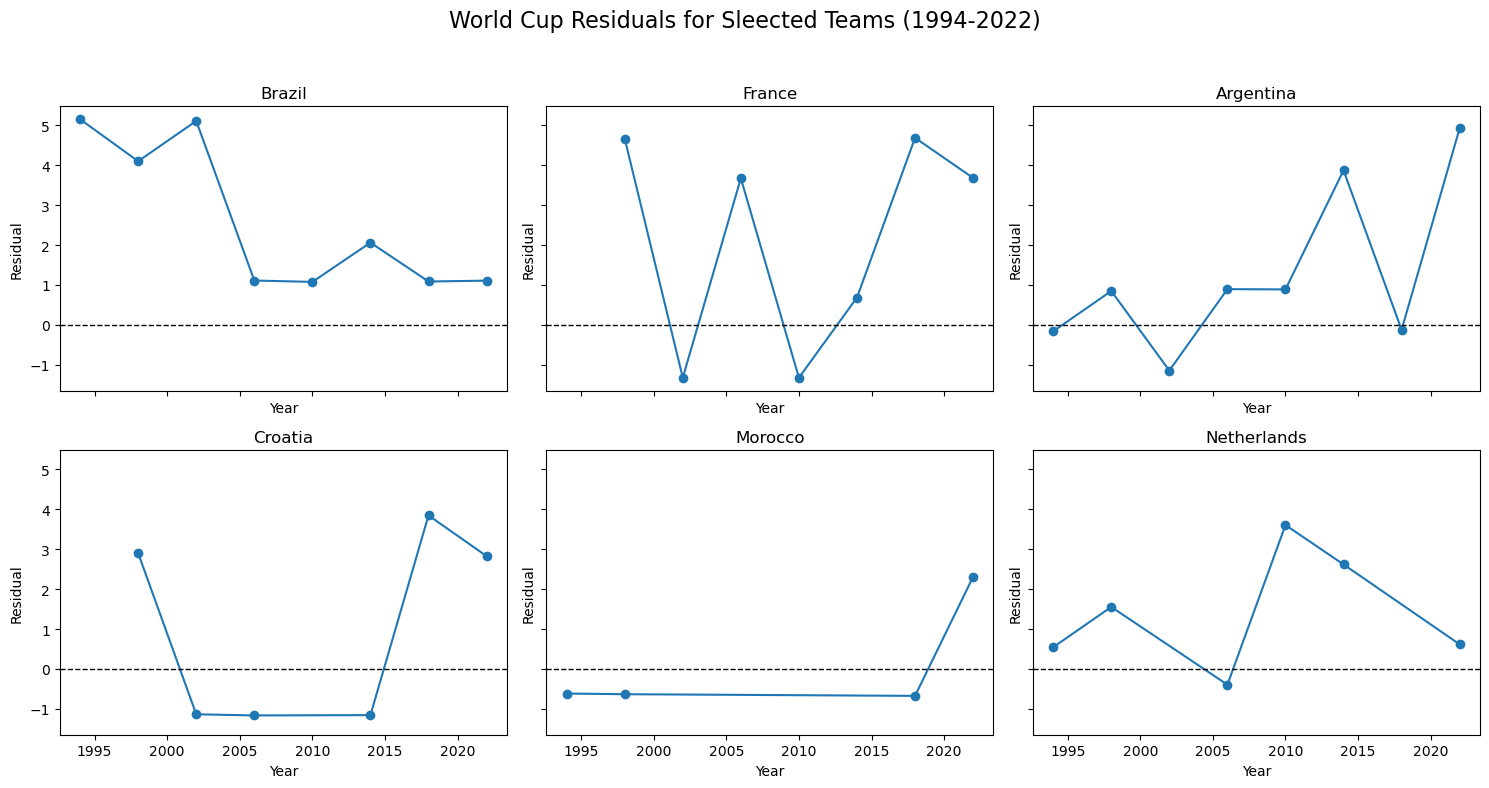

In [26]:
import matplotlib.pyplot as plt

# select teams to view
countries = ['Brazil', 'France', 'Argentina', 'Croatia', 'Morocco', 'Netherlands']
generate_team_plots(countries, 'World Cup Residuals for Sleected Teams (1994-2022)')


Morocco: 2022 was a breakout — a sharp spike after years of absence or modest performance, one-off peak behavior.

Argentina: The 2022 win stands out as a performance climax, but the subplot also shows they’ve had consistently positive residuals, reinforcing their status as a systematic overperformer.

Brazil: The visual decline is striking — from strong overperformance in earlier years to more muted or even neutral residuals recently. It’s not catastrophic, but it’s definitely “meh” compared to their historical dominance.

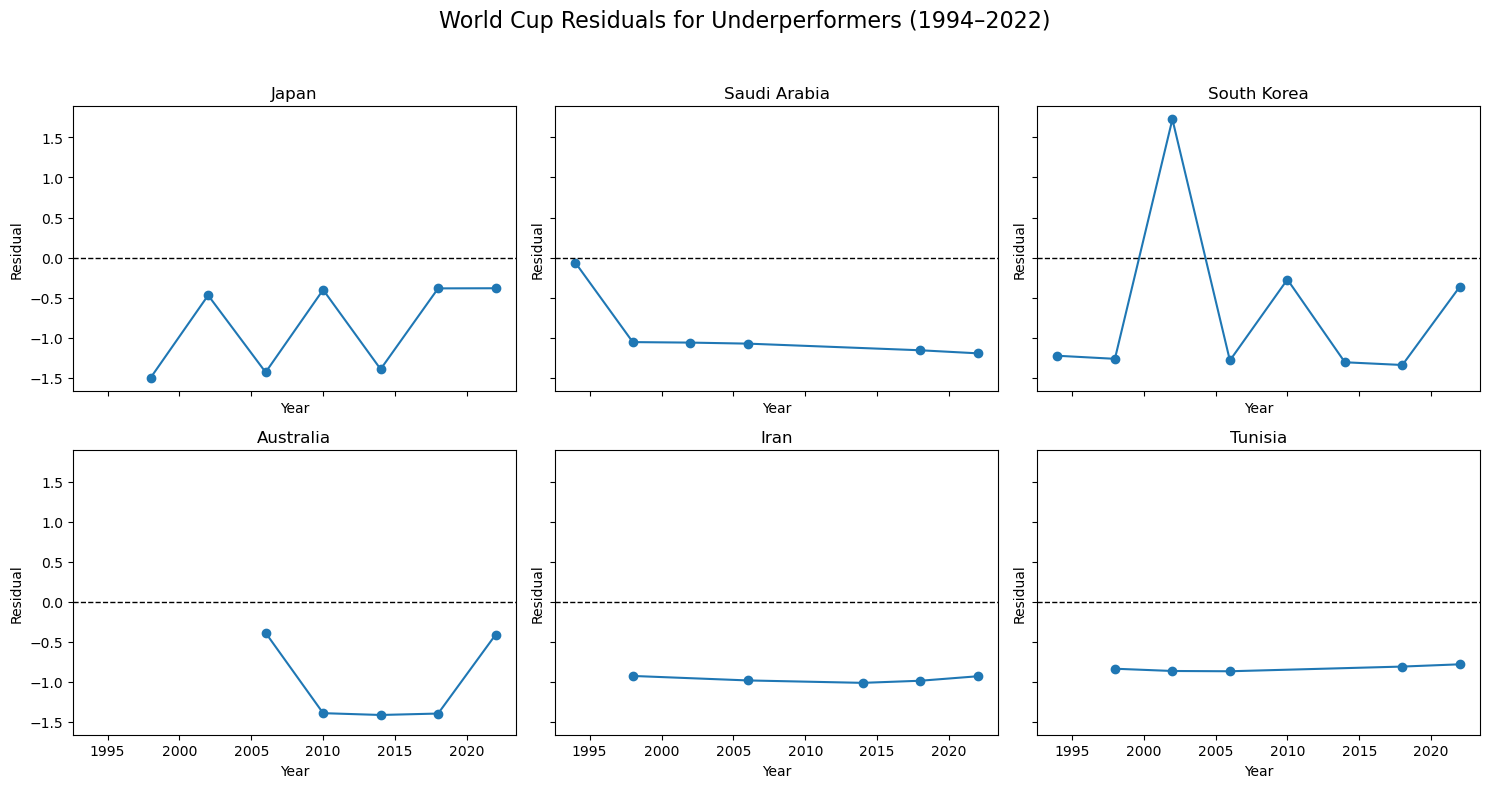

In [25]:
# get underperformers to plot
underperformers = country_perf.sort_values('weighted', ascending=True).head(6)['team'].values
generate_team_plots(underperformers, 'World Cup Residuals for Underperformers (1994–2022)')


**Japan**
- Qualified regularly (7 times since 1998).
- Residuals are negative because they usually exit in the Round of 16 or group stage.
- Their “best” runs (2018, 2022 Round of 16) still don’t exceed expectations relative to development indicators.

**Saudi Arabia**
- Frequent qualifications (6 times since 1994).
- Almost always group‑stage exits, except 1994 when they reached the Round of 16.
- Residuals stay negative because they rarely progress.

**South Korea**
- 8 qualifications, mostly underperforming.
- The 2002 semifinal is the one big positive spike, but otherwise they fall short of expectations.
- That’s why their mean residual is negative but max residual is positive.

**Australia**
- 5 qualifications, usually group‑stage exits.
- 2006 Round of 16 was their best run, but overall they underperform relative to development.

**Iran**
- 5 qualifications, never past the group stage.
- Residuals consistently negative, reflecting structural underperformance.

**Tunisia**
- 5 qualifications, also never past the group stage.
- Like Iran, their residuals are persistently negative.

### Reframed RQ3: Talent Composition vs Performance

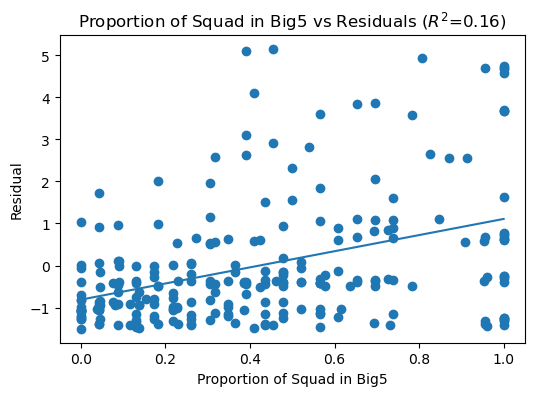

In [36]:
x = df_stage2['Big5_flag']
y = df_stage2['residual']

plt.figure(figsize=(6, 4))
plt.scatter(df_stage2['Big5_flag'], df_stage2['residual'])
plt.plot(np.unique(df_stage2['Big5_flag']), 
         np.poly1d(np.polyfit(df_stage2['Big5_flag'], df_stage2['residual'], 1))(np.unique(df_stage2['Big5_flag'])))
plt.ylabel('Residual')
plt.xlabel('Proportion of Squad in Big5')
plt.title(f'Proportion of Squad in Big5 vs Residuals ($R^2$={np.round(np.corrcoef(x, y)[0,1]**2, 3)})')
plt.show()

While a higher proportion of Big 5 league players is associated with better tournament performance, the relationship is modest. Talent composition alone does not guarantee success — tactical cohesion, tournament dynamics, and contextual factors play critical roles.

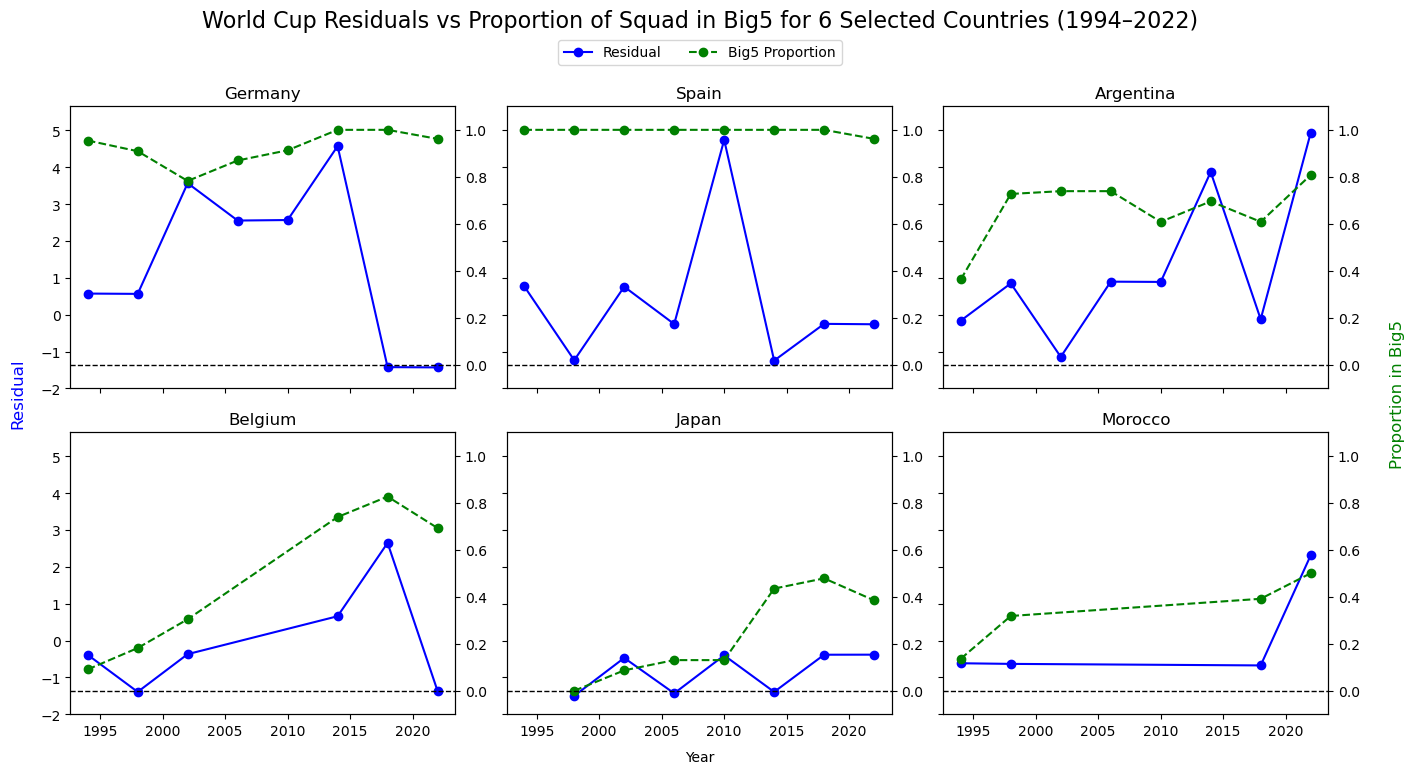

In [46]:
# generate subplots for selected countries to visualize residuals against proportion of squad aso in the big 5 european leagues
fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharex=True, sharey=True)
countries = ['Germany', 'Spain', 'Argentina', 'Belgium', 'Japan', 'Morocco']

resid_min = df_stage2['residual'].min() - 0.5
resid_max = df_stage2['residual'].max() + 0.5

big5_min = df_stage2['Big5_flag'].min() - 0.1
big5_max = df_stage2['Big5_flag'].max() + 0.1

axes = axes.flatten()

line_handles = []

for i, country in enumerate(countries):
    df_country = df_stage2[df_stage2['team']==country]

    ax1 = axes[i]
    l1, = ax1.plot(df_country['world_cup_year'], df_country['residual'], marker='o', linestyle='-', label='Residual', c='blue')
    ax2 = ax1.twinx()
    l2, = ax2.plot(df_country['world_cup_year'], df_country['Big5_flag'], marker='o', linestyle='--', label='Big5 Proportion', c='green')

    ax1.set_ylim(resid_min, resid_max)
    ax2.set_ylim(big5_min, big5_max)

    ax2.axhline(0, color='black', linestyle='--', linewidth=1)

    plt.title(f'{country}')

    if i == 0:
        line_handles.extend([l1, l2])

# Add shared labels
fig.text(0.5, 0.04, 'Year', ha='center')
fig.text(0.04, 0.5, 'Residual', va='center', rotation='vertical', color='blue', fontsize=12)
fig.text(0.96, 0.5, 'Proportion in Big5', va='center', rotation='vertical', color='green', fontsize=12)

fig.legend(handles=line_handles, loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=2)
plt.suptitle('World Cup Residuals vs Proportion of Squad in Big5 for 6 Selected Countries (1994–2022)', fontsize=16)
plt.tight_layout(rect=[0.05,0.05,0.95,0.95])
plt.show()

Talent composition (Big 5 share) is loosely correlated with performance, but not deterministically.

While countries like Belgium , Morocco and Argentina show alignment between elite club affiliation and overperformance, others like Germany and Spain demonstrate that high Big5 proportions do not immunize against failure. 

Morocco and Japan have similar Big5 proportions, both compratively lower than the other 4 countries. However Japan’s case illustrates that low Big5 representation does not automatically imply overperformance. While they have qualified consistently despite modest club pedigree, their tournament outcomes vary, with several instances of underperformance relative to development expectations, suggesting the additional role of cohesion, coaching, and confederation dynamics.